In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('experiment_sample_count_100_games.csv')
data.head()


,difficulty,sample_size,mine_count_considered,wins,num_games,samples_considered,time_elapsed
0,Beginner (9x9),"[4, 4]",True,30,100,3250,13.839860
1,Beginner (9x9),"[4, 4]",False,30,100,3258,13.019700
2,Beginner (9x9),"[5, 5]",True,72,100,2220,10.138655
3,Beginner (9x9),"[5, 5]",False,72,100,2227,9.338459
4,Beginner (9x9),"[6, 6]",True,72,100,1783,10.037750


In [1]:
data

NameError: name 'data' is not defined

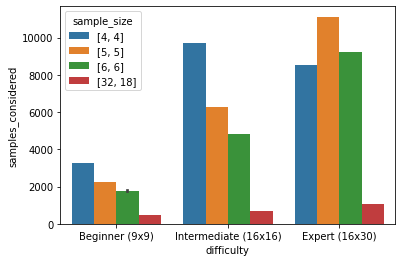

In [7]:
sns.barplot(x='difficulty', y='samples_considered', hue='sample_size', data=data)
plt.show()

In [86]:
m = data['mine_count_considered'] == True
df1, df2 = data[m], data[~m]
df1 = df1.drop(columns=['mine_count_considered'])
df2 = df2.drop(columns=['mine_count_considered'])

df1.difficulty = df1.difficulty.apply(lambda x: x + ' \nwithout mine count')
df2.difficulty = df2.difficulty.apply(lambda x: x + ' \nwith mine count')

modified_data = pd.concat([df1, df2])

modified_data.sample_size = modified_data.sample_size.apply(lambda x: 'x'.join(x.strip('[]').split(', ')))
full_grid_sizes = ['10x10', '17x17', '32x18']
modified_data.sample_size = modified_data.sample_size.replace(full_grid_sizes, 'whole grid')
modified_data.sample_size

0            4x4
2            5x5
4            6x6
6     whole grid
8            4x4
10           5x5
12           6x6
14    whole grid
16           4x4
18           5x5
20           6x6
22    whole grid
1            4x4
3            5x5
5            6x6
7     whole grid
9            4x4
11           5x5
13           6x6
15    whole grid
17           4x4
19           5x5
21           6x6
23    whole grid
Name: sample_size, dtype: object

In [66]:
order = sorted(list(modified_data.difficulty.unique()))
order

['Beginner (9x9) \nwith mine count',
 'Beginner (9x9) \nwithout mine count',
 'Expert (16x30) \nwith mine count',
 'Expert (16x30) \nwithout mine count',
 'Intermediate (16x16) \nwith mine count',
 'Intermediate (16x16) \nwithout mine count']

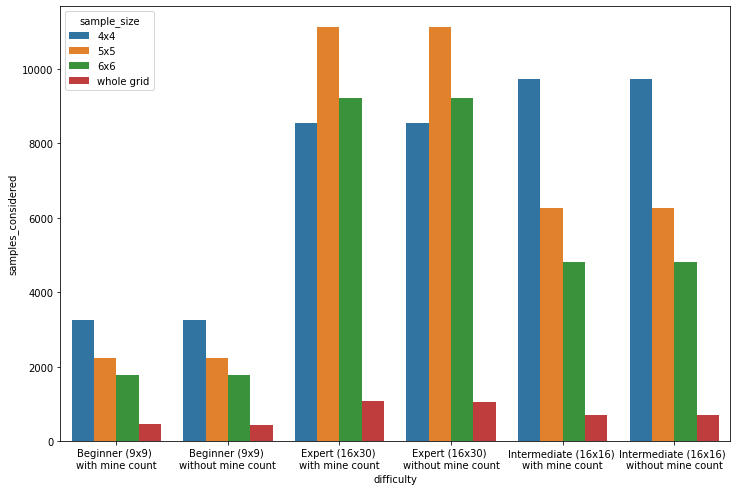

In [87]:
sns.barplot(x='difficulty',order=order, y='samples_considered', hue='sample_size', data=modified_data)

fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()